In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_moons
x,y=make_moons(n_samples=500,noise=0.4,random_state=1)

In [4]:
def plot_dataset(x,y,axes):
    plt.plot(x[y==0,0],x[y==0,1],'ro',markersize=3)
    plt.plot(x[y==1,0],x[y==1,1],'g^',markersize=3)
    plt.axis(axes)
    plt.grid(True,which='both')
    plt.xlabel('$x_1$',fontsize=18)
    plt.ylabel('$x_2$',fontsize=18)

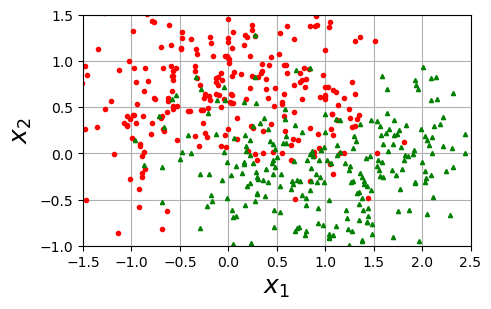

In [5]:
plt.figure(figsize=(5,3))
plot_dataset(x,y,[-1.5,2.5,-1,1.5])
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
log_clf=LogisticRegression(solver='lbfgs',random_state=1)
svm_clf=SVC(random_state=1)
tree_clf=DecisionTreeClassifier(random_state=1)

In [8]:
from sklearn.ensemble import VotingClassifier
hard_clf=VotingClassifier([
    ('lr',log_clf),
    ('svc',svm_clf),
    ('tree',tree_clf)
],voting='hard')
hard_clf.fit(x_train,y_train)
hard_clf.predict(x_test[:5])

array([0, 1, 1, 1, 1], dtype=int64)

In [9]:
for clf in (log_clf,svm_clf,tree_clf,hard_clf):
    clf.fit(x_train,y_train)
    print(clf.__class__.__name__,':',clf.score(x_test,y_test))

LogisticRegression : 0.8
SVC : 0.816
DecisionTreeClassifier : 0.792
VotingClassifier : 0.824


In [10]:
svm_clf_prob=SVC(probability=True,random_state=1)
soft_clf=VotingClassifier([
    ('lr',log_clf),
    ('svc_prob',svm_clf_prob),
    ('tree',tree_clf)
],voting='soft')
soft_clf.fit(x_train,y_train)
soft_clf.predict(x_test[:5])

array([1, 1, 1, 1, 1], dtype=int64)

In [11]:
for clf in (log_clf,svm_clf_prob,tree_clf,soft_clf):
    clf.fit(x_train,y_train)
    print(clf.__class__.__name__,':',clf.score(x_test,y_test))

LogisticRegression : 0.8
SVC : 0.816
DecisionTreeClassifier : 0.792
VotingClassifier : 0.816


In [12]:
np.random.seed(1)
m=500
x=10*np.random.rand(m,1)-6
y=(10+6*x+5*x**2+30*np.random.randn(m,1)).ravel()

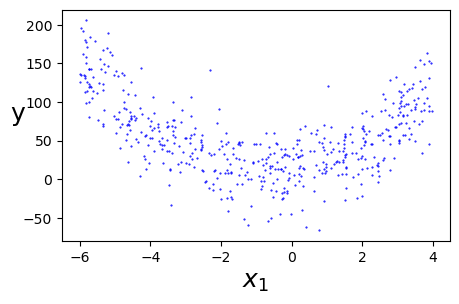

In [13]:
plt.figure(figsize=(5,3))
plt.plot(x,y,'b.',markersize=1)
plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('y',rotation=0,fontsize=18)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
lin_reg=LinearRegression()
svm_reg=SVR()
tree_reg=DecisionTreeRegressor(random_state=1)

In [17]:
from sklearn.ensemble import VotingRegressor
en_reg=VotingRegressor([
    ('lr',lin_reg),
    ('svr',svm_reg),
    ('tree',tree_reg)
])
en_reg.fit(x_train,y_train)
en_reg.predict(x_test[:3])

array([72.93796074, 69.30204704, 66.91043906])

In [18]:
for clf in (lin_reg,svm_reg,tree_reg,en_reg):
    clf.fit(x_train,y_train)
    print(clf.__class__.__name__,':',clf.score(x_test,y_test))

LinearRegression : 0.09605657899672848
SVR : 0.44742278240821287
DecisionTreeRegressor : 0.18698761628988958
VotingRegressor : 0.4546500851874544


In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
from sklearn.datasets import make_moons
x,y=make_moons(n_samples=500,noise=0.30,random_state=2)

In [21]:
def plot_dataset(x,y,axes):
    plt.plot(x[y==0,0],x[y==0,1],'ro',markersize=3)
    plt.plot(x[y==1,0],x[y==1,1],'g^',markersize=3)
    plt.axis(axes)
    plt.xlabel('$x_1$',fontsize=18)
    plt.ylabel('$x_2$',fontsize=18)

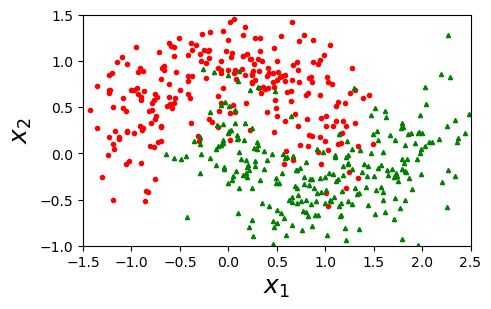

In [22]:
plt.figure(figsize=(5,3))
plot_dataset(x,y,[-1.5,2.5,-1,1.5])
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [24]:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier(random_state=1)
tree_clf.fit(x_train,y_train)
tree_clf.score(x_train,y_train)

1.0

In [25]:
tree_clf.score(x_test,y_test)

0.808

In [27]:
from sklearn.ensemble import BaggingClassifier
base_clf=DecisionTreeClassifier()
bag_clf=BaggingClassifier(base_clf,n_estimators=500,
                          max_samples=100, max_features=2,
                          bootstrap=True, bootstrap_features=False,
                          oob_score=True, random_state=1)
bag_clf.fit(x_train,y_train)
bag_clf.score(x_train,y_train)

0.9413333333333334

In [28]:
bag_clf.score(x_test,y_test)

0.896

In [29]:
bag_clf.oob_score_

0.9093333333333333

In [30]:
bag_clf.oob_decision_function_[:3]

array([[0.25125628, 0.74874372],
       [0.935     , 0.065     ],
       [0.05154639, 0.94845361]])

In [31]:
def plot_decision_boundary(clf,x,y,axes=[-1.5,2.45,-1,1.5]):
    x1s=np.linspace(axes[0],axes[1],100)
    x2s=np.linspace(axes[2],axes[3],100)
    x1,x2=np.meshgrid(x1s,x2s)
    x_new=np.c_[x1.ravel(),x2.ravel()]
    y_pred=clf.predict(x_new).reshape(x1.shape)
    plt.contourf(x1,x2,y_pred,alpha=0.2)
    plt.contour(x1,x2,y_pred)
    plot_dataset(x,y,axes)

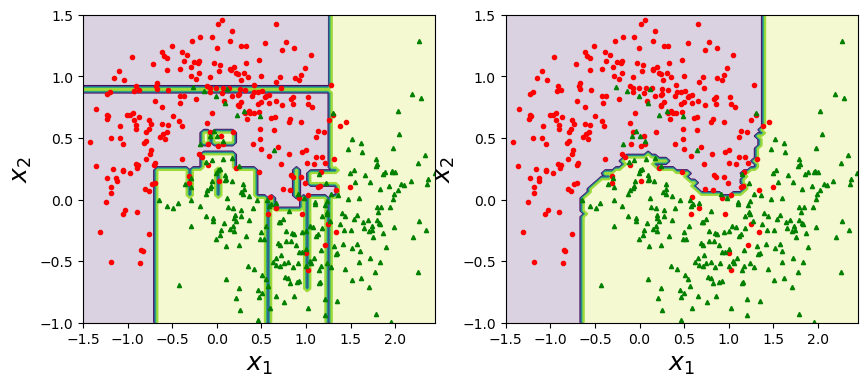

In [32]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plot_decision_boundary(tree_clf,x,y)
plt.subplot(122)
plot_decision_boundary(bag_clf,x,y)
plt.show()

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
from sklearn.datasets import make_moons
x,y=make_moons(n_samples=500,noise=0.30,random_state=2)

In [35]:
def plot_dataset(x,y,axes):
    plt.plot(x[y==0,0],x[y==0,1],'ro',markersize=3)
    plt.plot(x[y==1,0],x[y==1,1],'g^',markersize=3)
    plt.axis(axes)
    plt.xlabel('$x_1$',fontsize=18)
    plt.ylabel('$x_2$',fontsize=18)

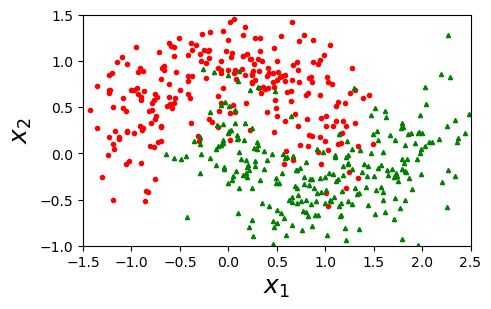

In [36]:
plt.figure(figsize=(5,3))
plot_dataset(x,y,[-1.5,2.5,-1,1.5])
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [38]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,
                              oob_score=True,random_state=1)
rnd_clf.fit(x_train,y_train)
rnd_clf.score(x_train,y_train)

0.9573333333333334

In [39]:
rnd_clf.oob_score_

0.9093333333333333

In [40]:
rnd_clf.score(x_test,y_test)

0.88

In [42]:
rnd_clf.feature_importances_

array([0.38183967, 0.61816033])

In [44]:
def plot_decision_boundary(clf,x,y,axes=[-1.5,2.45,-1,1.5]):
    x1s=np.linspace(axes[0],axes[1],100)
    x2s=np.linspace(axes[2],axes[3],100)
    x1,x2=np.meshgrid(x1s,x2s)
    x_new=np.c_[x1.ravel(),x2.ravel()]
    y_pred=clf.predict(x_new).reshape(x1.shape)
    plt.contourf(x1,x2,y_pred,alpha=0.2)
    plt.contour(x1,x2,y_pred)
    plot_dataset(x,y,axes)

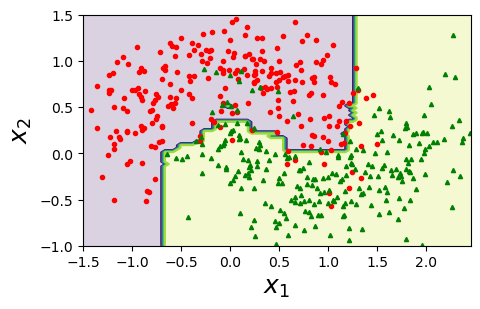

In [45]:
plt.figure(figsize=(5,3))
plot_decision_boundary(rnd_clf,x,y)
plt.show()

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
ext_clf=ExtraTreesClassifier(random_state=1)
ext_clf.fit(x_train,y_train)
ext_clf.score(x_test,y_test)

0.864

In [49]:
ext_clf.feature_importances_

array([0.42425007, 0.57574993])

In [52]:
np.random.seed(1)
m=200
x=np.random.rand(m,1)
y=4*(x[:,0]-0.5)**2+np.random.randn(m)/10

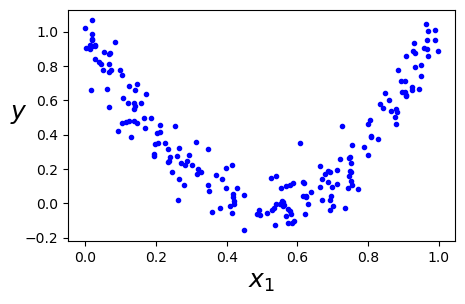

In [53]:
plt.figure(figsize=(5,3))
plt.plot(x,y,'b.')
plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$y$',fontsize=18,rotation=0)
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [55]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg=RandomForestRegressor(n_estimators=500,max_leaf_nodes=16,
                             oob_score=True,random_state=1)
rnd_reg.fit(x_train,y_train)
rnd_reg.score(x_train,y_train)

0.9417364410547316

In [56]:
rnd_reg.oob_score_

0.8746177182126228

In [57]:
rnd_reg.score(x_test,y_test)

0.9157119465346966

In [58]:
rnd_reg.feature_importances_

array([1.])

In [59]:
def plot_regression_predictions(model,x,y,axes=[0,1,-0.2,1]):
    x1=np.linspace(axes[0],axes[1],500).reshape(-1,1)
    y_pred=model.predict(x1)
    plt.plot(x,y,'b.')
    plt.plot(x1,y_pred,'r-',linewidth=2,label='$\hat{y}$')
    plt.axis(axes)
    plt.xlabel('$x_1$',fontsize=18)
    plt.ylabel('$y$',fontsize=18,rotation=0)
    plt.legend(loc='upper center',fontsize=14)

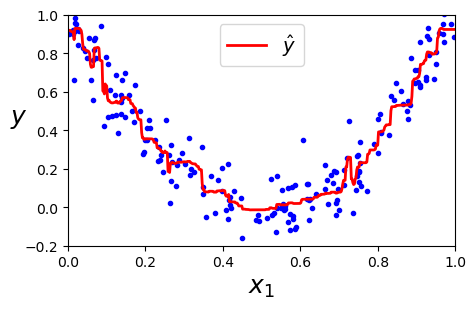

In [60]:
plt.figure(figsize=(5,3))
plot_regression_predictions(rnd_reg,x,y)
plt.show()

In [62]:
from sklearn.ensemble import ExtraTreesRegressor
ext_reg=ExtraTreesRegressor(random_state=1)
ext_reg.fit(x_train,y_train)
ext_reg.score(x_test,y_test)

0.8723823510592347

In [63]:
ext_reg.feature_importances_

array([1.])